In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


## READ DATA

In [ ]:
import pandas as pd
#Membaca file csv
df = pd.read_csv('gojek_review (5).csv')
df

,Unnamed: 0,content,score,Year,Month,Day
0,3431,Sampai saat ini tidak ada kendala apapun. Mula...,5,2018,9,14
1,7311,"Baru coba Go-Food sih, sejauh ini cukup baik m...",4,2018,9,14
2,3732,Untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15
3,5676,Saya senang menggunakan aplikasi gojek khususn...,2,2018,9,15
4,2691,"Sekadar memberi saran ya,,tarifnya untuk para ...",5,2018,9,15
...,...,...,...,...,...,...
9995,269,Perlu perbaikan buat gofood ny kan sistemnya d...,4,2024,10,22
9996,48,Sekarang driver suka cancel seenak nya ya! ora...,1,2024,10,22
9997,2280,"Mantap sih, Tapi sayang terlalu mahal",5,2024,10,22
9998,4345,Tolong dong gopaypinjam saya udah dilunasi tru...,4,2024,10,22


In [ ]:
#Penyebaran data berdasarkan score
df['score'].value_counts()

,count
score,
1,4845
5,2043
2,1171
3,1168
4,773


<Axes: xlabel='score'>

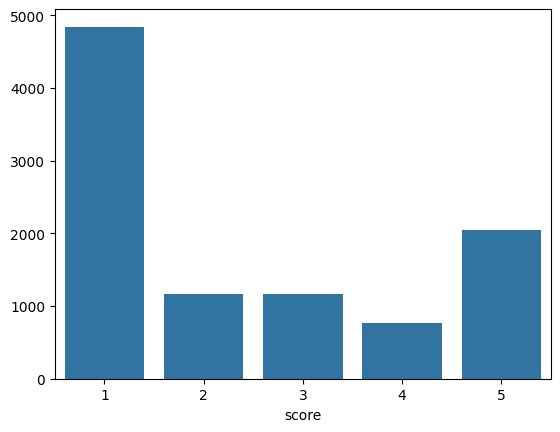

In [ ]:
#Visualisasi penyebaran
import seaborn as sns
result = df.groupby(['score']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

## LABELING SENTIMENT

In [ ]:
sentimen = []
for index, row in df.iterrows():
    if row['score'] > 3:
        sentimen.append(1)
    elif row['score'] < 3:
        sentimen.append(-1)
    else:
        sentimen.append(None)

df['sentiment'] = sentimen
df = df.dropna(subset=['sentiment'])


<Axes: xlabel='sentiment'>

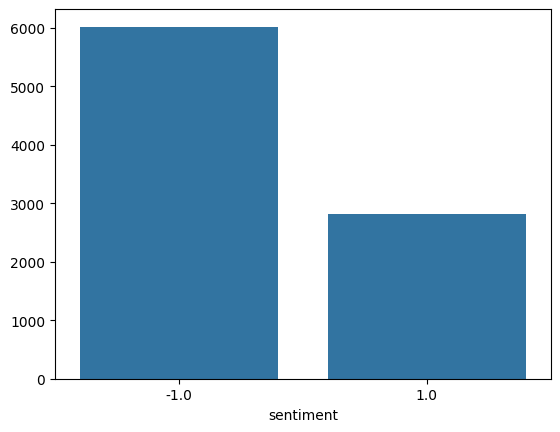

In [ ]:
#Visualisasi sentiment
df_new = df[['Year', 'Month', 'sentiment']]
result = df_new.groupby(['sentiment']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

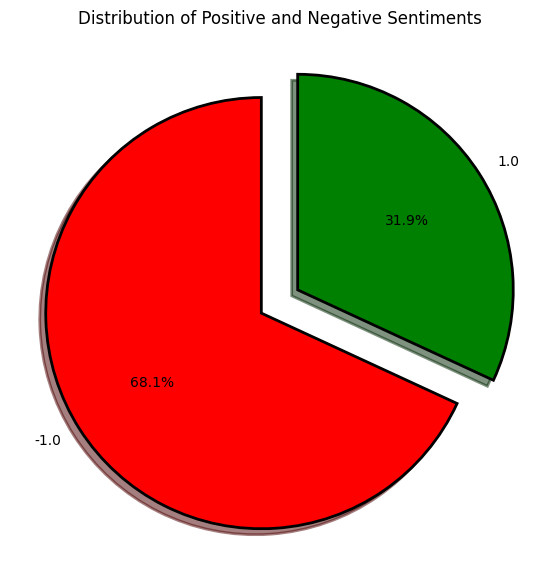

In [ ]:
#Persentase diagram phie sentyment
import matplotlib.pyplot as plt


df_filtered = df[df['sentiment'] != 0]


tags = df_filtered['sentiment'].value_counts()


colors = ('red', 'green')
explode = (0.1, 0.1)


fig = plt.figure(figsize=(7, 7))
wp = {'linewidth': 2, 'edgecolor': 'black'}
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, wedgeprops=wp, explode=explode, label='')

plt.title('Distribution of Positive and Negative Sentiments')
plt.ylabel('')
plt.show()


# TEXT PRE-PROCESSING

 ### TOKENIZATION

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


df['content'] = df['content'].str.replace(r'https\S+', ' ', regex=True) #Menghapus URL
df['content'] = df['content'].str.lower() #Mengubah Teks ke Huruf Kecil
df['content'] = df['content'].str.replace(r'@\S+', ' ', regex=True) #Menghapus mention
df['content'] = df['content'].str.replace(r'#\S+', ' ', regex=True)#Menghapus hashtag
df['content'] = df['content'].str.replace(r"\'\w+", ' ', regex=True) #Menghapus kontraksi
df['content'] = df['content'].str.replace(r"[^\w\s]", ' ', regex=True) #Menghapus karakter non alfanumerik
df['content'] = df['content'].str.replace(r"\s+", ' ', regex=True) #Menghapus spasi berlebihan

# Tokenisasi menggunakan RegexpTokenizer untuk memecah teks menjadi kata individual
regexp = RegexpTokenizer(r'\w+')
df['content_token'] = df['content'].apply(regexp.tokenize)

# Tampilkan hasil
df.head(5)

<ipython-input-8-b09648dacc47>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.replace(r'https\S+', ' ', regex=True)
<ipython-input-8-b09648dacc47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.lower()
<ipython-input-8-b09648dacc47>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Unnamed: 0,content,score,Year,Month,Day,sentiment,content_token
0,3431,sampai saat ini tidak ada kendala apapun mulai...,5,2018,9,14,1.0,"[sampai, saat, ini, tidak, ada, kendala, apapu..."
1,7311,baru coba go food sih sejauh ini cukup baik me...,4,2018,9,14,1.0,"[baru, coba, go, food, sih, sejauh, ini, cukup..."
2,3732,untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15,-1.0,"[untuk, masalah, promo, go, pay, ketentuannya,..."
3,5676,saya senang menggunakan aplikasi gojek khususn...,2,2018,9,15,-1.0,"[saya, senang, menggunakan, aplikasi, gojek, k..."
4,2691,sekadar memberi saran ya tarifnya untuk para p...,5,2018,9,15,1.0,"[sekadar, memberi, saran, ya, tarifnya, untuk,..."


## Stopword Removal

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Membuat list kata Indonesian stopwords
stopwords = nltk.corpus.stopwords.words("indonesian")
#Menambah kata khusus ke dalam stopwords
my_stopwords = ['gojek']
stopwords.extend(my_stopwords)
# Hapus stopwords
df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-9-25eaaa415cc2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])


,Unnamed: 0,content,score,Year,Month,Day,sentiment,content_token
0,3431,sampai saat ini tidak ada kendala apapun mulai...,5,2018,9,14,1.0,"[kendala, apapun, topup, order, gocar, gofood,..."
1,7311,baru coba go food sih sejauh ini cukup baik me...,4,2018,9,14,1.0,"[coba, go, food, sih, pesan, estimasi, hargany..."
2,3732,untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15,-1.0,"[promo, go, pay, ketentuannya, berubah, ubah, ..."
3,5676,saya senang menggunakan aplikasi gojek khususn...,2,2018,9,15,-1.0,"[senang, aplikasi, gofood, tolonglah, voucher,..."
4,2691,sekadar memberi saran ya tarifnya untuk para p...,5,2018,9,15,1.0,"[saran, ya, tarifnya, pengemudi, tolong, diper..."


## Stemming

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x])
df.head(5)

<ipython-input-10-64ae80f90f83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x])


,Unnamed: 0,content,score,Year,Month,Day,sentiment,content_token,stemmed
0,3431,sampai saat ini tidak ada kendala apapun mulai...,5,2018,9,14,1.0,"[kendala, apapun, topup, order, gocar, gofood,...","[kendala, apa, topup, order, gocar, gofood, go..."
1,7311,baru coba go food sih sejauh ini cukup baik me...,4,2018,9,14,1.0,"[coba, go, food, sih, pesan, estimasi, hargany...","[coba, go, food, sih, pesan, estimasi, harga, ..."
2,3732,untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15,-1.0,"[promo, go, pay, ketentuannya, berubah, ubah, ...","[promo, go, pay, tentu, ubah, ubah, cash, back..."
3,5676,saya senang menggunakan aplikasi gojek khususn...,2,2018,9,15,-1.0,"[senang, aplikasi, gofood, tolonglah, voucher,...","[senang, aplikasi, gofood, tolong, voucher, vo..."
4,2691,sekadar memberi saran ya tarifnya untuk para p...,5,2018,9,15,1.0,"[saran, ya, tarifnya, pengemudi, tolong, diper...","[saran, ya, tarif, kemudi, tolong, perhati, ti..."


In [ ]:
df

,Unnamed: 0,content,score,Year,Month,Day,sentiment,content_token,stemmed
0,3431,sampai saat ini tidak ada kendala apapun mulai...,5,2018,9,14,1.0,"[kendala, apapun, topup, order, gocar, gofood,...","[kendala, apa, topup, order, gocar, gofood, go..."
1,7311,baru coba go food sih sejauh ini cukup baik me...,4,2018,9,14,1.0,"[coba, go, food, sih, pesan, estimasi, hargany...","[coba, go, food, sih, pesan, estimasi, harga, ..."
2,3732,untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15,-1.0,"[promo, go, pay, ketentuannya, berubah, ubah, ...","[promo, go, pay, tentu, ubah, ubah, cash, back..."
3,5676,saya senang menggunakan aplikasi gojek khususn...,2,2018,9,15,-1.0,"[senang, aplikasi, gofood, tolonglah, voucher,...","[senang, aplikasi, gofood, tolong, voucher, vo..."
4,2691,sekadar memberi saran ya tarifnya untuk para p...,5,2018,9,15,1.0,"[saran, ya, tarifnya, pengemudi, tolong, diper...","[saran, ya, tarif, kemudi, tolong, perhati, ti..."
...,...,...,...,...,...,...,...,...,...
9995,269,perlu perbaikan buat gofood ny kan sistemnya d...,4,2024,10,22,1.0,"[perbaikan, gofood, ny, sistemnya, disiapin, r...","[baik, gofood, ny, sistem, disiapin, resto, bi..."
9996,48,sekarang driver suka cancel seenak nya ya oran...,1,2024,10,22,-1.0,"[driver, suka, cancel, seenak, nya, ya, orang,...","[driver, suka, cancel, enak, nya, ya, orang, n..."
9997,2280,mantap sih tapi sayang terlalu mahal,5,2024,10,22,1.0,"[mantap, sih, sayang, mahal]","[mantap, sih, sayang, mahal]"
9998,4345,tolong dong gopaypinjam saya udah dilunasi tru...,4,2024,10,22,1.0,"[tolong, gopaypinjam, udah, dilunasi, trus, dp...","[tolong, gopaypinjam, udah, lunas, trus, dpt, ..."


## Cleaning ( Menghapus kata yang kurang dari 4 huruf)

In [ ]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join(filter(lambda item: len(item) > 3, x))) #Contoh sih, loh
df.head(5)

<ipython-input-12-44c47af7f3de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_string'] = df['stemmed'].apply(lambda x: ' '.join(filter(lambda item: len(item) > 3, x))) #Contoh sih, loh


,Unnamed: 0,content,score,Year,Month,Day,sentiment,content_token,stemmed,text_string
0,3431,sampai saat ini tidak ada kendala apapun mulai...,5,2018,9,14,1.0,"[kendala, apapun, topup, order, gocar, gofood,...","[kendala, apa, topup, order, gocar, gofood, go...",kendala topup order gocar gofood pulsa bills l...
1,7311,baru coba go food sih sejauh ini cukup baik me...,4,2018,9,14,1.0,"[coba, go, food, sih, pesan, estimasi, hargany...","[coba, go, food, sih, pesan, estimasi, harga, ...",coba food pesan estimasi harga ubah taken ojol...
2,3732,untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15,-1.0,"[promo, go, pay, ketentuannya, berubah, ubah, ...","[promo, go, pay, tentu, ubah, ubah, cash, back...",promo tentu ubah ubah cash back belanja alfama...
3,5676,saya senang menggunakan aplikasi gojek khususn...,2,2018,9,15,-1.0,"[senang, aplikasi, gofood, tolonglah, voucher,...","[senang, aplikasi, gofood, tolong, voucher, vo...",senang aplikasi gofood tolong voucher voucher ...
4,2691,sekadar memberi saran ya tarifnya untuk para p...,5,2018,9,15,1.0,"[saran, ya, tarifnya, pengemudi, tolong, diper...","[saran, ya, tarif, kemudi, tolong, perhati, ti...",saran tarif kemudi tolong perhati timbang kasi...


In [ ]:
#Konversi type data
df['text_string'] = df['text_string'].astype('str')
df['text_string'] = df['text_string'].astype(pd.StringDtype())
df.dtypes

<ipython-input-13-c8ca1c29b067>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_string'] = df['text_string'].astype('str')
<ipython-input-13-c8ca1c29b067>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_string'] = df['text_string'].astype(pd.StringDtype())


,0
Unnamed: 0,int64
content,object
score,int64
Year,int64
Month,int64
Day,int64
sentiment,float64
content_token,object
stemmed,object
text_string,string[python]


# WORDCLOUD

## Wordcloud Positive

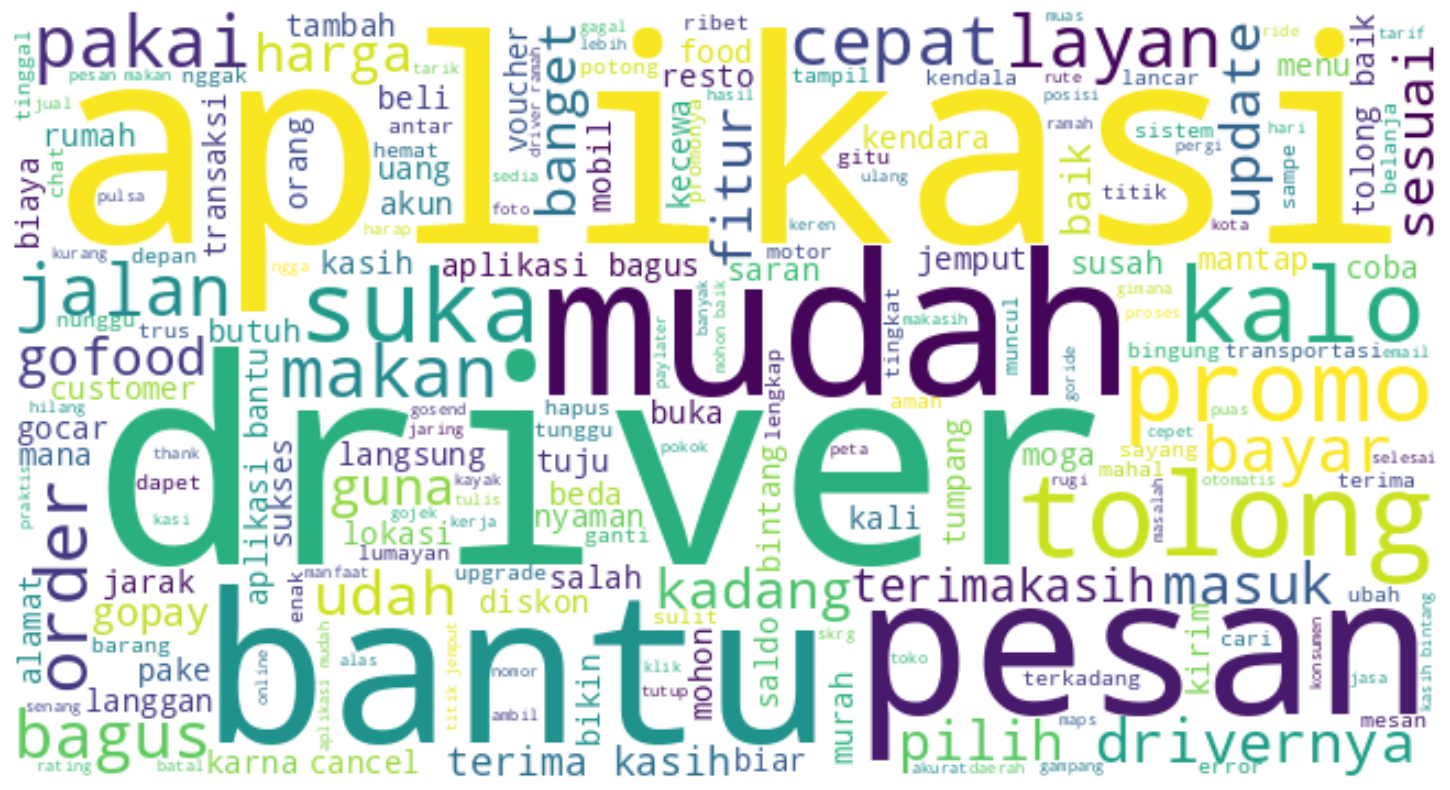

In [ ]:
df_p=df[df['sentiment']==1]
all_words_lem = ' '.join([word for word in df_p['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=650, height=350, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

## Wordcloud Negative

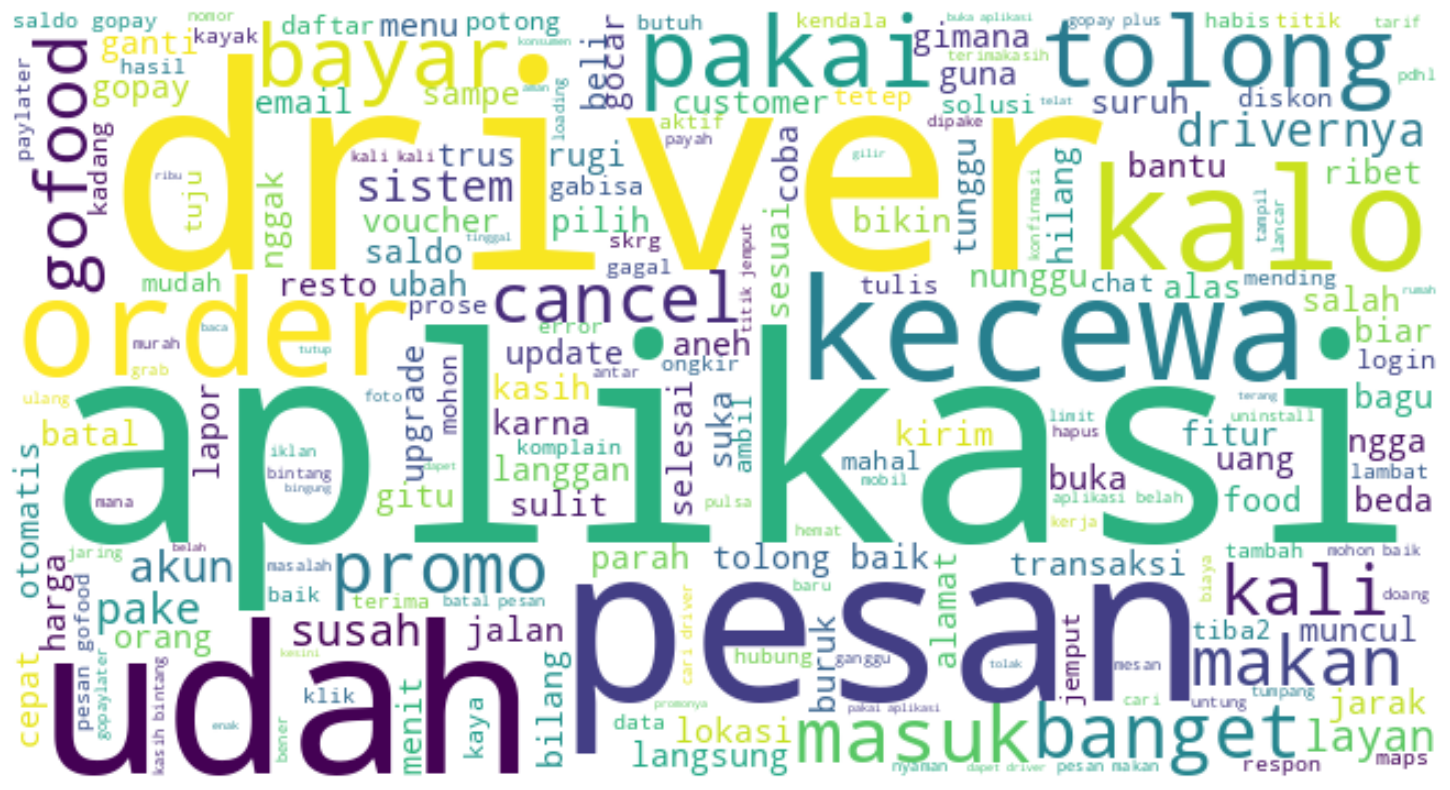

In [ ]:
df_p=df[df['sentiment']==-1]
all_words_lem = ' '.join([word for word in df_p['text_string']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=650, height=350, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# PREDIKSI SENTIMEN

In [ ]:
df

,Unnamed: 0,content,score,Year,Month,Day,sentiment,content_token,stemmed,text_string
0,3431,sampai saat ini tidak ada kendala apapun mulai...,5,2018,9,14,1.0,"[kendala, apapun, topup, order, gocar, gofood,...","[kendala, apa, topup, order, gocar, gofood, go...",kendala topup order gocar gofood pulsa bills l...
1,7311,baru coba go food sih sejauh ini cukup baik me...,4,2018,9,14,1.0,"[coba, go, food, sih, pesan, estimasi, hargany...","[coba, go, food, sih, pesan, estimasi, harga, ...",coba food pesan estimasi harga ubah taken ojol...
2,3732,untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15,-1.0,"[promo, go, pay, ketentuannya, berubah, ubah, ...","[promo, go, pay, tentu, ubah, ubah, cash, back...",promo tentu ubah ubah cash back belanja alfama...
3,5676,saya senang menggunakan aplikasi gojek khususn...,2,2018,9,15,-1.0,"[senang, aplikasi, gofood, tolonglah, voucher,...","[senang, aplikasi, gofood, tolong, voucher, vo...",senang aplikasi gofood tolong voucher voucher ...
4,2691,sekadar memberi saran ya tarifnya untuk para p...,5,2018,9,15,1.0,"[saran, ya, tarifnya, pengemudi, tolong, diper...","[saran, ya, tarif, kemudi, tolong, perhati, ti...",saran tarif kemudi tolong perhati timbang kasi...
...,...,...,...,...,...,...,...,...,...,...
9995,269,perlu perbaikan buat gofood ny kan sistemnya d...,4,2024,10,22,1.0,"[perbaikan, gofood, ny, sistemnya, disiapin, r...","[baik, gofood, ny, sistem, disiapin, resto, bi...",baik gofood sistem disiapin resto biar drivern...
9996,48,sekarang driver suka cancel seenak nya ya oran...,1,2024,10,22,-1.0,"[driver, suka, cancel, seenak, nya, ya, orang,...","[driver, suka, cancel, enak, nya, ya, orang, n...",driver suka cancel enak orang nunggu driver lo...
9997,2280,mantap sih tapi sayang terlalu mahal,5,2024,10,22,1.0,"[mantap, sih, sayang, mahal]","[mantap, sih, sayang, mahal]",mantap sayang mahal
9998,4345,tolong dong gopaypinjam saya udah dilunasi tru...,4,2024,10,22,1.0,"[tolong, gopaypinjam, udah, dilunasi, trus, dp...","[tolong, gopaypinjam, udah, lunas, trus, dpt, ...",tolong gopaypinjam udah lunas trus limit tarik...


In [ ]:
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics
# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Vectorization (TF IDF)

In [ ]:
X = df['text_string']
y = df['sentiment']
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [ ]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

### Train Test Split

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

#Membagi data train dan data test
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3)
#random forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, random_forest_classifier_prediction)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, random_forest_classifier_prediction))

Accuracy: 0.9053156146179402

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.87      0.95      0.91       596
         1.0       0.94      0.86      0.90       608

    accuracy                           0.91      1204
   macro avg       0.91      0.91      0.91      1204
weighted avg       0.91      0.91      0.91      1204



### Evaluation

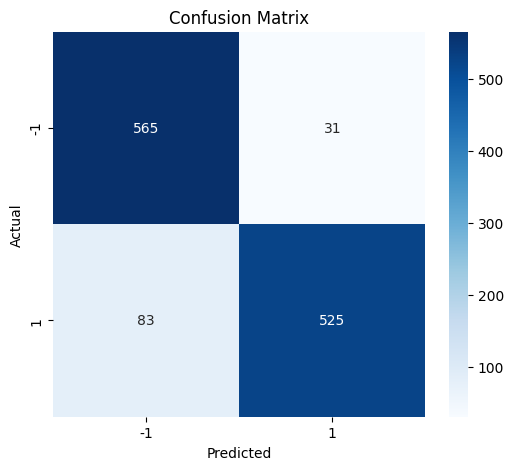

In [ ]:
from sklearn.metrics import confusion_matrix

# Matriks Kebingungannya (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, random_forest_classifier_prediction)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

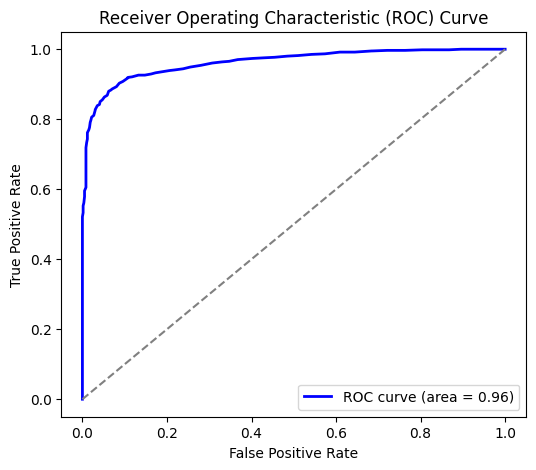

In [ ]:
# Plot ROC Curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

# Menghitung nilai ROC Curve
fpr, tpr, _ = roc_curve(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

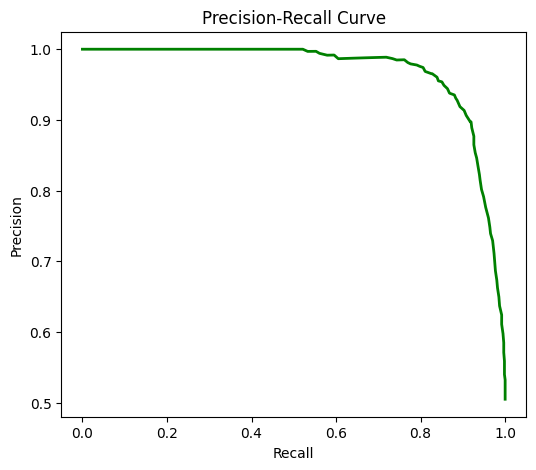

In [ ]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

# Menghitung Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Model Evaluation - Additional Metrics (e.g., F1 Score, Precision, Recall)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, precision_recall_curve

print("Additional Model Evaluation Metrics:")

# F1 Score Calculation
f1 = 2 * (precision_score(y_test, random_forest_classifier_prediction) * recall_score(y_test, random_forest_classifier_prediction)) / (precision_score(y_test, random_forest_classifier_prediction) + recall_score(y_test, random_forest_classifier_prediction))
print("F1 Score:", f1)

# Precision
precision = precision_score(y_test, random_forest_classifier_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, random_forest_classifier_prediction)
print("Recall:", recall)

Additional Model Evaluation Metrics:
F1 Score: 0.9020618556701031
Precision: 0.9442446043165468
Recall: 0.8634868421052632


### Load Model

In [ ]:
import joblib  # untuk menyimpan model

# Menyimpan model setelah training
joblib.dump(random_forest_classifier, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

# Menyimpan TF-IDF transformer
joblib.dump(tfid, 'tfidf_transformer.pkl')
print("TF-IDF transformer saved as 'tfidf_transformer.pkl'")


Model saved as 'random_forest_model.pkl'
TF-IDF transformer saved as 'tfidf_transformer.pkl'


In [ ]:
import joblib  # untuk menyimpan model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Simpan model setelah training
joblib.dump(random_forest_classifier, '/content/drive/MyDrive/random_forest_model.pkl')
print("Model telah disimpan di Google Drive dengan nama 'random_forest_model.pkl'")

# Simpan TF-IDF transformer
joblib.dump(tfid, '/content/drive/MyDrive/tfidf_transformer.pkl')
print("TF-IDF transformer telah disimpan di Google Drive dengan nama 'tfidf_transformer.pkl'")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model telah disimpan di Google Drive dengan nama 'random_forest_model.pkl'
TF-IDF transformer telah disimpan di Google Drive dengan nama 'tfidf_transformer.pkl'


In [ ]:
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Lokasi file model dan TF-IDF di Google Drive
model_path = '/content/drive/MyDrive/random_forest_model.pkl'
tfid_path = '/content/drive/MyDrive/tfidf_transformer.pkl'

# Muat model dan TF-IDF dari file
loaded_model = joblib.load(model_path)
tfid = joblib.load(tfid_path)

# Cek apakah model dan TF-IDF berhasil dimuat
print("Model dan TF-IDF berhasil dimuat!")


Mounted at /content/drive
Model dan TF-IDF berhasil dimuat!


### Prediksi Kata

In [ ]:
# Teks baru yang ingin diprediksi
new_text = ["sangat banyak iklan dalam aplikasi"]

# Transformasi teks baru dengan TF-IDF
new_text_tfidf = tfid.transform(new_text)

# Prediksi menggunakan model
new_prediction = loaded_model.predict(new_text_tfidf)

# Mapping untuk sentimen
sentiment_map = {1: "Positif", -1: "Negatif"}
predicted_sentiment = sentiment_map[new_prediction[0]]

# Tampilkan hasil
print("Teks:", new_text[0])
print("Prediksi Sentimen:", predicted_sentiment)

Teks: sangat banyak iklan dalam aplikasi
Prediksi Sentimen: Negatif


In [ ]:
# Teks baru yang ingin diprediksi
new_text = ["pengantaran cepat"]

# Transformasi teks baru dengan TF-IDF
new_text_tfidf = tfid.transform(new_text)

# Prediksi menggunakan model
new_prediction = loaded_model.predict(new_text_tfidf)

# Mapping untuk sentimen
sentiment_map = {1: "Positif", -1: "Negatif"}
predicted_sentiment = sentiment_map[new_prediction[0]]

# Tampilkan hasil
print("Teks:", new_text[0])
print("Prediksi Sentimen:", predicted_sentiment)

Teks: pengantaran cepat
Prediksi Sentimen: Positif
